# Homework 04

The goal for this homework will be to learn more about how you can use ```groupby``` and how merging can be used to improve your ability to generate hypotheses.

## Problem one 

Lets use the "doctor visits" dataset again and explore how we can use groupby to summarize more complicated groups.
Please use the groupby function in Python to compute the mean number of doctor visits stratified by the patient's gender *and* private health insurance. You should have four groups. 

In [1]:
import pandas as pd
import numpy as np 

doctorVisits = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/AER/DoctorVisits.csv")
doctorVisits

,rownames,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no


## Problem two 

Please compute the mean and standard deviation for patients whose income is above the median and below the median income. 
Note: Use the assign function to create a column that can be used to identify patients above and below the median income. 

## Problem three

The ```hue``` keyword in seaborn is used to build a plot stratified by the column identified by ```hue```.
For example, we could compute a boxplot for patient's annual income by whether they own private health insurance. We could further stratify our patient population by whether or not the patient has a limiting chronic condition (```lchronic```).

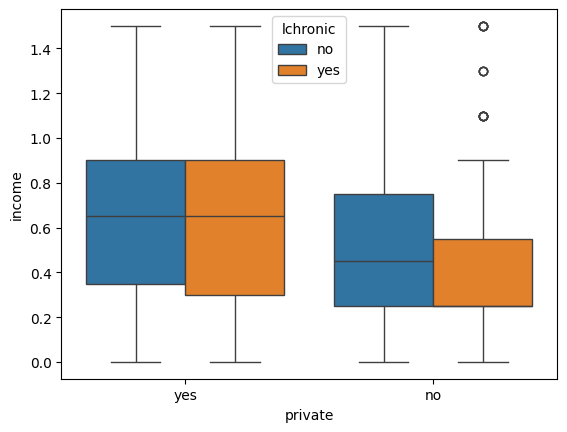

In [31]:
import seaborn as sns 
sns.boxplot(  x    = "private"
            , hue  = "lchronic"
            , y    = "income"
            , data = doctorVisits)
plt.show()